# Value and Growth 

In [16]:
import pandas_datareader.data as web
from pandas.plotting import table 
import dataframe_image as dfi
import requests
import urllib.parse
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import plotly.express as px
from datetime import datetime, date, timedelta
import numpy as np
import investpy
import yfinance as yf
import datetime
from numpy.random import multivariate_normal
import datetime as dt
from datetime import datetime
import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
# import chart_studio
# # chart_studio.tools.set_credentials_file(username='LucianaManuali', api_key='IIMaoPMHYSUTvSRJGFIA')
# import chart_studio.plotly as py
import dataframe_image as df
import investpy as inv

In [17]:
# Define a function to import data from Yahoo Finance

def importYFdata(tickers,tickers_labels):
    data = pd.DataFrame(columns=tickers)

    for ticker in tickers:
        data[ticker] = yf.download(ticker)['Adj Close']
    
    data.columns = tickers_labels
    data = data.round(2)
    data = data.dropna()
    data.index = pd.to_datetime(data.index)
    
    return data

# Data

In [18]:
priceV = importYFdata(['VTV','IVE','RPV','SPYV','IWD','VBR'],['Vanguard Value Index Fund ETF','iShares S&P 500 Value ETF','Invesco S&P 500 Pure Value ETF','SPDR Portfolio S&P 500 Value ETF','iShares Russell 1000 Value ETF','Vanguard Small-Cap Value Index Fund ETF'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
priceG = importYFdata(['VUG','IVW','IWF','SPYG','QQQ'],['Vanguard Growth ETF','iShares S&P 500 Growth ETF','iShares Russell 1000 Growth ETF','SPDR Portfolio S&P 500 Growth ETF','Invesco QQQ Trust'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
priceVG = importYFdata(['VTV','VUG','VOO'],['Vanguard Value Index Fund ETF','Vanguard Growth ETF','Vanguard 500 Index Fund ETF'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
#Rfr = importYFdata(['^IRX'],['13 Week Treasury Bill Rate'])

# Historical Performance 

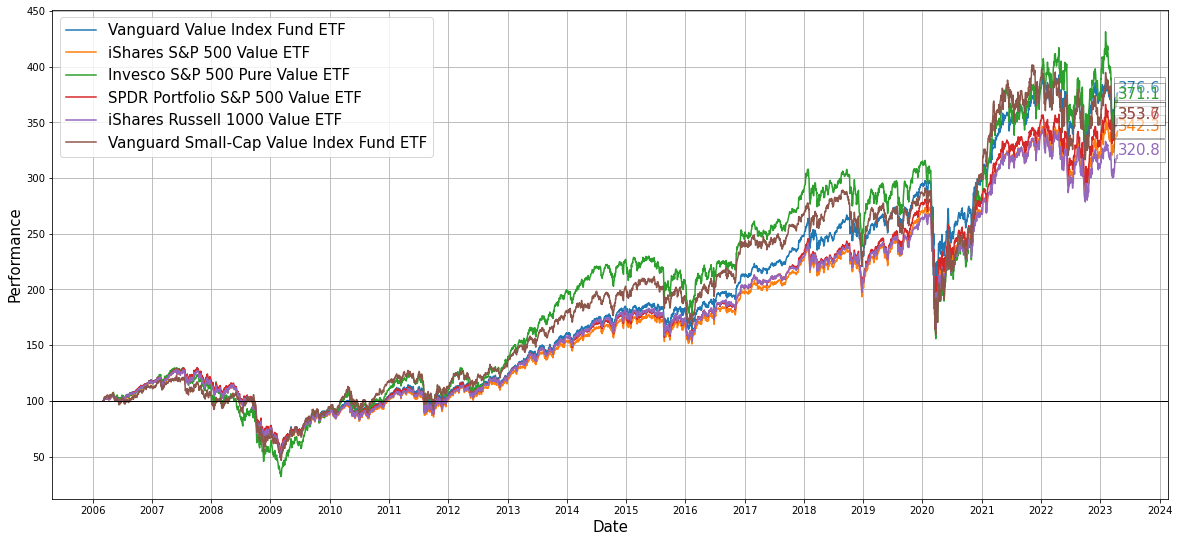

In [22]:
# Plot the historical performance of selected ETFs

fig = plt.figure(figsize = (20,9))
plt.plot(priceV.loc[priceV.index[0]:]/priceV.loc[priceV.index[0]]*100)

palette = sns.color_palette('tab10', len(priceV.columns))
for x, color in zip(priceV.columns, palette):
    plt.annotate(str(np.round(priceV[x].iloc[-1]/priceV[x].loc[priceV.index[0]]*100, 1)),(priceV.index[-1]+timedelta(1), priceV[x].iloc[-1]/priceV[x].loc[priceV.index[0]]*100), color = color, size = 15, bbox=dict(facecolor='white', alpha=0.3))

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

    
plt.axhline(100, color = 'black', lw = 1)
plt.grid(True)
plt.legend(priceV.columns, prop={'size': 15})
plt.ylabel('Performance', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Value Historical Performance.png')

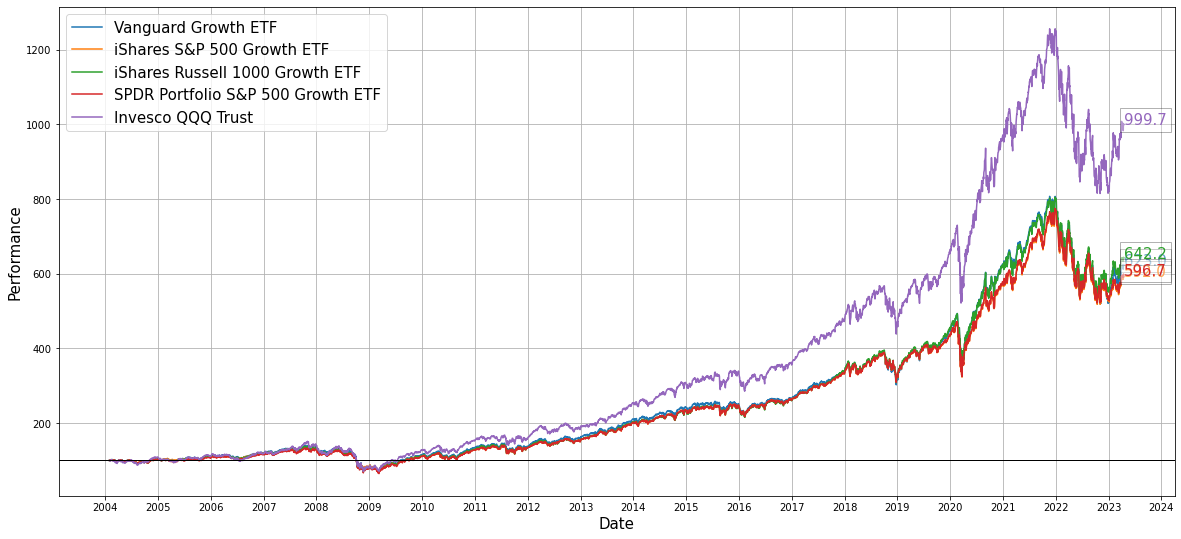

In [23]:
# Plot the historical performance of selected ETFs

fig = plt.figure(figsize = (20,9))
plt.plot(priceG.loc[priceG.index[0]:]/priceG.loc[priceG.index[0]]*100)

palette = sns.color_palette('tab10', len(priceG.columns))
for x, color in zip(priceG.columns, palette):
    plt.annotate(str(np.round(priceG[x].iloc[-1]/priceG[x].loc[priceG.index[0]]*100, 1)),(priceG.index[-1]+timedelta(1), priceG[x].iloc[-1]/priceG[x].loc[priceG.index[0]]*100), color = color, size = 15, bbox=dict(facecolor='white', alpha=0.3))

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.axhline(100, color = 'black', lw = 1)
plt.grid(True)
plt.legend(priceG.columns, prop={'size': 15})
plt.ylabel('Performance', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Growth Historical Performance.png')

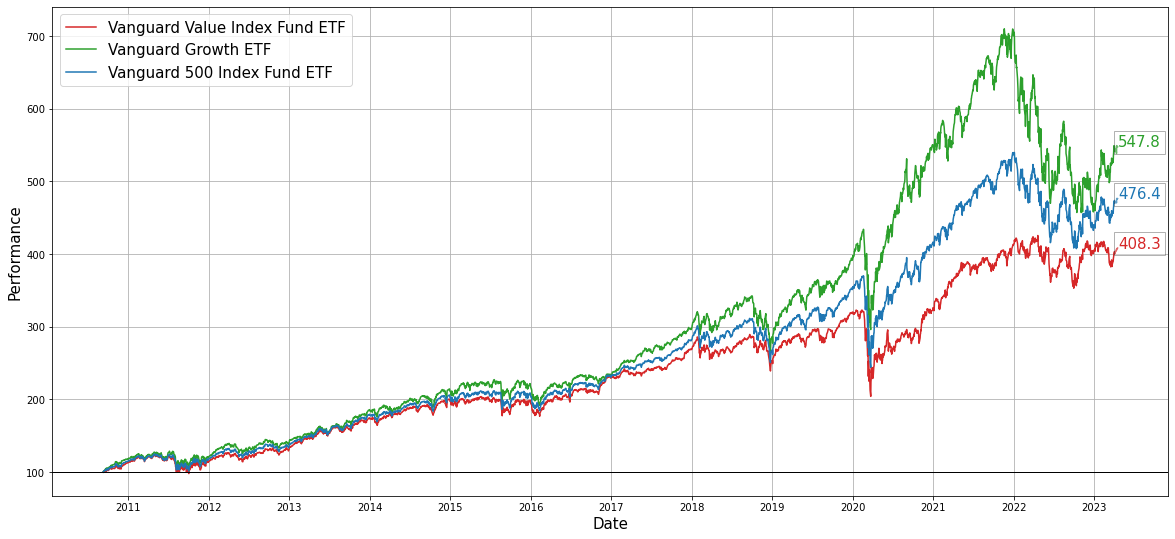

In [24]:
# Plot the historical performance of selected ETFs

fig = plt.figure(figsize = (20,9))
plt.plot(priceVG['Vanguard Value Index Fund ETF'].loc[priceVG.index[0]:]/priceVG['Vanguard Value Index Fund ETF'].loc[priceVG.index[0]]*100, color = 'tab:red', label = 'Vanguard Value Index Fund ETF')

plt.annotate(str(np.round(priceVG['Vanguard Value Index Fund ETF'].iloc[-1]/priceVG['Vanguard Value Index Fund ETF'].loc[priceVG.index[0]]*100, 1)),(priceVG['Vanguard Value Index Fund ETF'].index[-1]+timedelta(1), priceVG['Vanguard Value Index Fund ETF'].iloc[-1]/priceVG['Vanguard Value Index Fund ETF'].loc[priceVG.index[0]]*100), size = 15, bbox=dict(facecolor='white', alpha=0.3), color = 'tab:red')

plt.plot(priceVG['Vanguard Growth ETF'].loc[priceVG.index[0]:]/priceVG['Vanguard Growth ETF'].loc[priceVG.index[0]]*100, color = 'tab:green', label = 'Vanguard Growth ETF')

plt.annotate(str(np.round(priceVG['Vanguard Growth ETF'].iloc[-1]/priceVG['Vanguard Growth ETF'].loc[priceVG.index[0]]*100, 1)),(priceVG['Vanguard Growth ETF'].index[-1]+timedelta(1), priceVG['Vanguard Growth ETF'].iloc[-1]/priceVG['Vanguard Growth ETF'].loc[priceVG.index[0]]*100), size = 15, bbox=dict(facecolor='white', alpha=0.3), color = 'tab:green')
  
plt.plot(priceVG['Vanguard 500 Index Fund ETF'].loc[priceVG.index[0]:]/priceVG['Vanguard 500 Index Fund ETF'].loc[priceVG.index[0]]*100, color = 'tab:blue', label = 'Vanguard 500 Index Fund ETF')

plt.annotate(str(np.round(priceVG['Vanguard 500 Index Fund ETF'].iloc[-1]/priceVG['Vanguard 500 Index Fund ETF'].loc[priceVG.index[0]]*100, 1)),(priceVG['Vanguard 500 Index Fund ETF'].index[-1]+timedelta(1), priceVG['Vanguard 500 Index Fund ETF'].iloc[-1]/priceVG['Vanguard 500 Index Fund ETF'].loc[priceVG.index[0]]*100), size = 15, bbox=dict(facecolor='white', alpha=0.3), color = 'tab:blue')

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.axhline(100, color = 'black', lw = 1)
plt.grid(True)
plt.legend(prop={'size': 15})
plt.ylabel('Performance', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\VG Historical Performance.png')

# Return Measures

## Daily Returns 

In [25]:
simple_returnsV = priceV.pct_change().round(4).dropna()

In [26]:
simple_returnsG = priceG.pct_change().round(4).dropna()

In [27]:
simple_returnsVG = priceVG.pct_change().round(4).dropna()

## Annual Returns (1Y Investment)

In [28]:
# Calculate for each day the return of holding the asset for a year until that date

returnsx1yearV = priceV.pct_change(periods = 252)
returnsx1yearV = returnsx1yearV.dropna()
returnsx1yearV = returnsx1yearV.round(4)

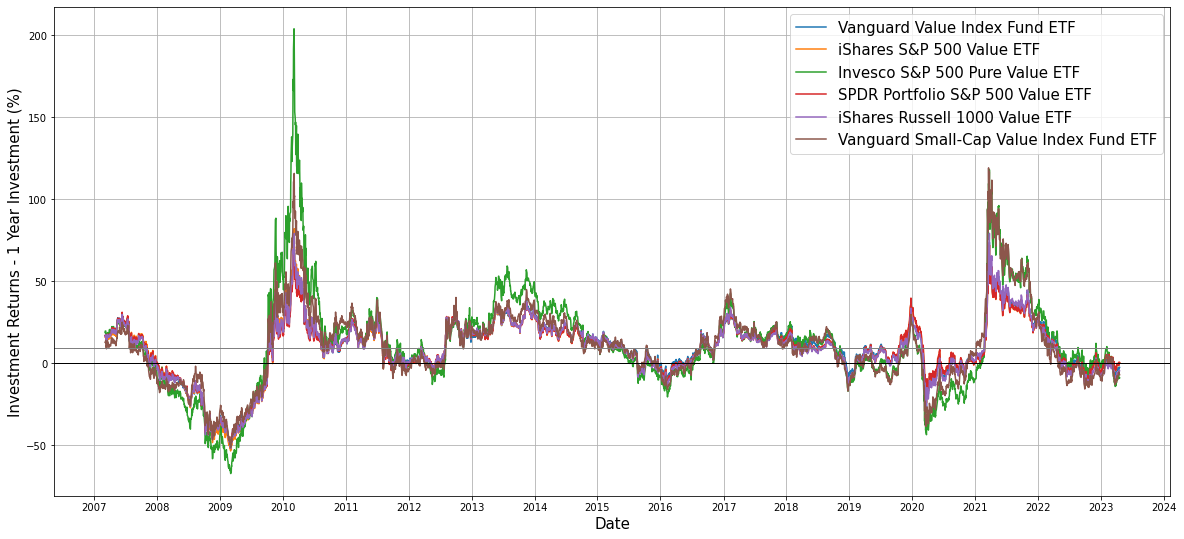

In [29]:
# Plot returns

fig = plt.figure(figsize = (20,9))
plt.plot(returnsx1yearV*100)

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.axhline(0, color = 'black', lw = 1)
plt.legend(returnsx1yearV.columns, prop={'size': 15})
plt.ylabel('Investment Returns - 1 Year Investment (%)', size = 15)
plt.axhline(returnsx1yearV['Vanguard Value Index Fund ETF'].mean()*100, color = 'grey', lw = 1, label = 'Mean Vanguard 500 Index Fund ETF')
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Annual Returns (1 year) V.png')

In [30]:
# Calculate for each day the return of holding the asset for a year until that date

returnsx1yearG = priceG.pct_change(periods = 252)
returnsx1yearG = returnsx1yearG.dropna()
returnsx1yearG = returnsx1yearG.round(4)

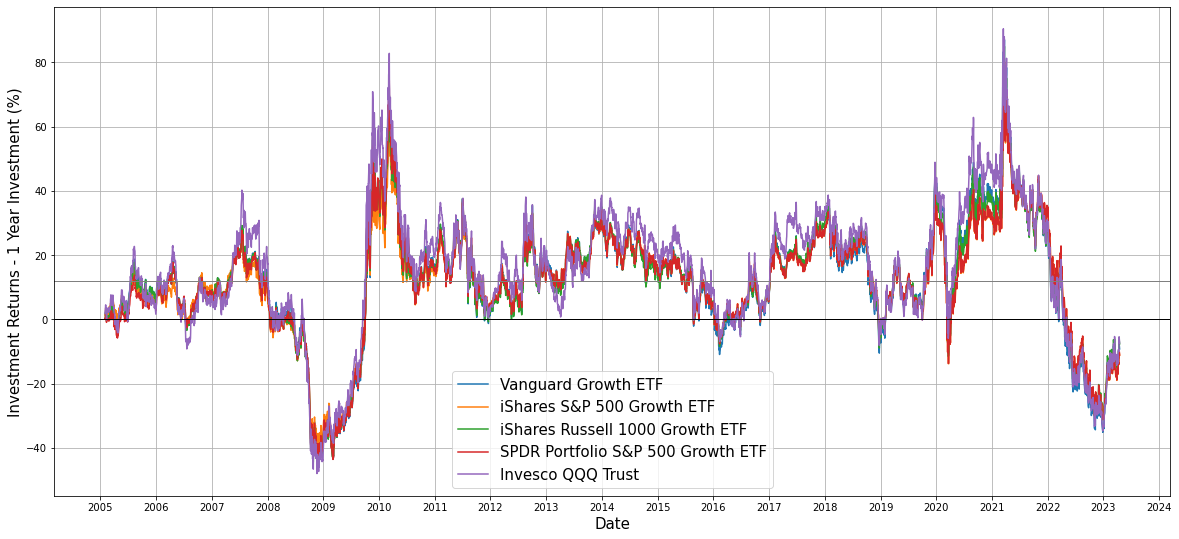

In [31]:
# Plot returns

fig = plt.figure(figsize = (20,9))
plt.plot(returnsx1yearG*100)

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.axhline(0, color = 'black', lw = 1)
plt.legend(returnsx1yearG.columns, prop={'size': 15})
plt.axhline(returnsx1yearG['Vanguard Growth ETF'].mean()*100, color = 'grey', lw = 1, label = 'Mean Vanguard Growth ETF')
plt.ylabel('Investment Returns - 1 Year Investment (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Annual Returns (1 year) G.png')

In [32]:
# Calculate for each day the return of holding the asset for a year until that date

returnsx1yearVG = priceVG.pct_change(periods = 252)
returnsx1yearVG = returnsx1yearVG.dropna()
returnsx1yearVG = returnsx1yearVG.round(4)

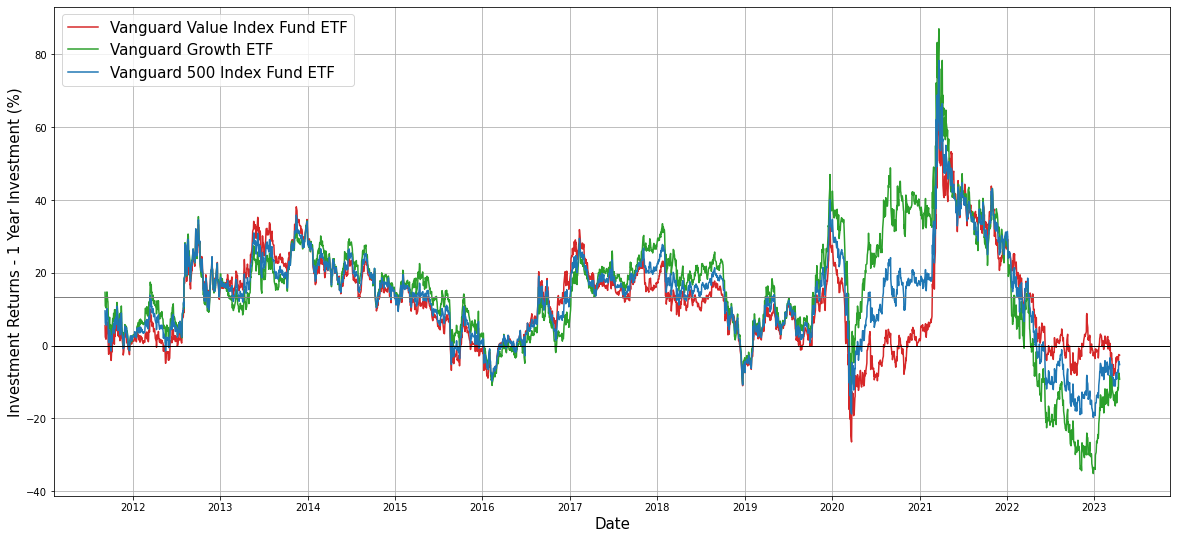

In [33]:
# Plot returns

fig = plt.figure(figsize = (20,9))
plt.plot(returnsx1yearVG['Vanguard Value Index Fund ETF']*100, color = 'tab:red')
plt.plot(returnsx1yearVG['Vanguard Growth ETF']*100, color = 'tab:green')
plt.plot(returnsx1yearVG['Vanguard 500 Index Fund ETF']*100, color = 'tab:blue')

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.axhline(0, color = 'black', lw = 1)
plt.axhline(returnsx1yearVG['Vanguard 500 Index Fund ETF'].mean()*100, color = 'grey', lw = 1)
plt.legend(returnsx1yearVG.columns, prop={'size': 15})
plt.ylabel('Investment Returns - 1 Year Investment (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Annual Returns (1 year) VG.png')

## Annual Returns (3Y Investment)

In [34]:
# Calculate for each day the return of holding the asset for 3 years until that date

returnsx3yearV = priceV.pct_change(periods = 756)
returnsx3yearV = returnsx3yearV.dropna()
returnsx3yearV = returnsx3yearV.round(4)

In [35]:
# Annualize investment returns for 3 years 

returnsx3year_annV = (1+returnsx3yearV)**(1/3)-1

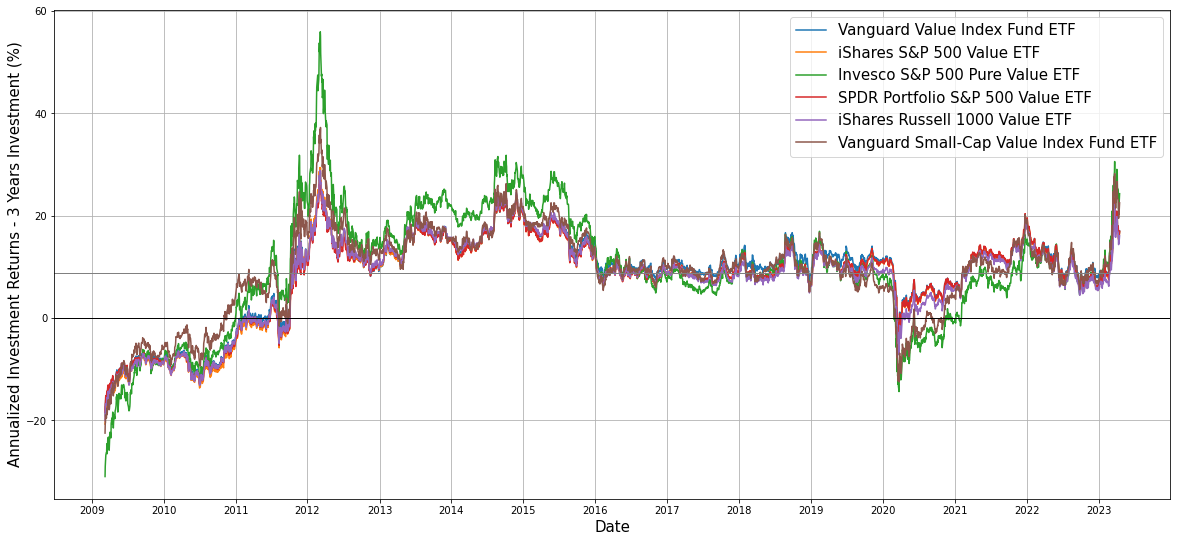

In [36]:
# Plot returns

fig = plt.figure(figsize = (20,9))
plt.plot(returnsx3year_annV*100)

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.legend(returnsx3year_annV.columns, prop={'size': 15})
plt.axhline(returnsx3year_annV['Vanguard Value Index Fund ETF'].mean()*100, color = 'grey', lw = 1, label = 'Mean Vanguard 500 Index Fund ETF')
plt.axhline(0, color = 'black', lw = 1)
plt.ylabel('Annualized Investment Returns - 3 Years Investment (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Annual Returns (3 years) V.png')

In [37]:
# Calculate for each day the return of holding the asset for 3 years until that date

returnsx3yearG = priceG.pct_change(periods = 756)
returnsx3yearG = returnsx3yearG.dropna()
returnsx3yearG = returnsx3yearG.round(4)

In [38]:
# Annualize investment returns for 3 years 

returnsx3year_annG = (1+returnsx3yearG)**(1/3)-1

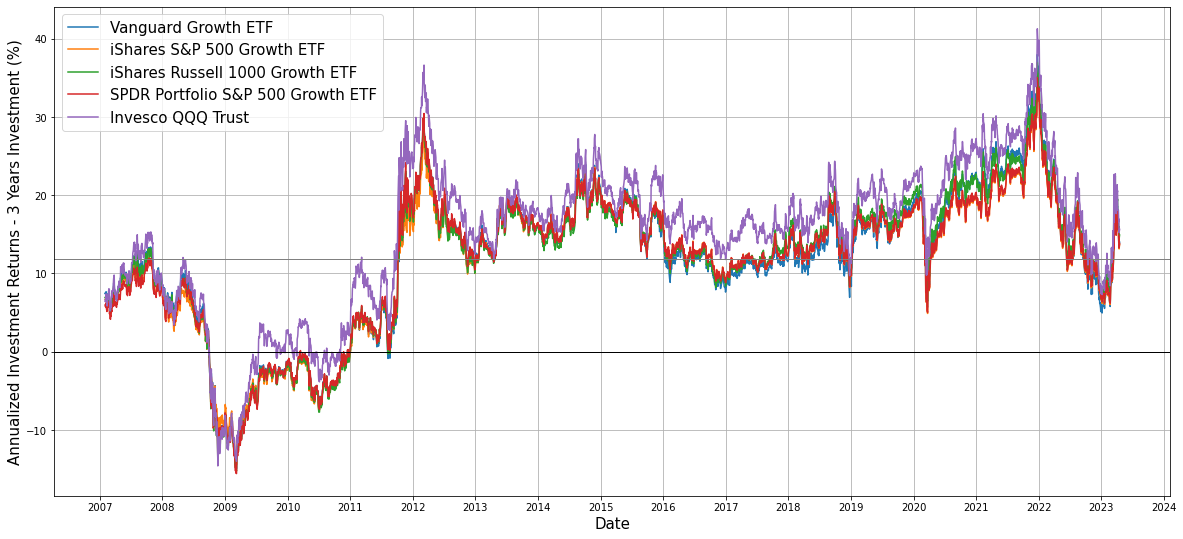

In [39]:
# Plot returns

fig = plt.figure(figsize = (20,9))
plt.plot(returnsx3year_annG*100)

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.legend(returnsx3year_annG.columns, prop={'size': 15})
plt.axhline(returnsx3year_annG['Vanguard Growth ETF'].mean()*100, color = 'grey', lw = 1, label = 'Mean Vanguard Growth ETF')
plt.axhline(0, color = 'black', lw = 1)
plt.ylabel('Annualized Investment Returns - 3 Years Investment (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Annual Returns (3 years) G.png')

In [40]:
# Calculate for each day the return of holding the asset for 3 years until that date

returnsx3yearVG = priceVG.pct_change(periods = 756)
returnsx3yearVG = returnsx3yearVG.dropna()
returnsx3yearVG = returnsx3yearVG.round(4)

In [41]:
# Annualize investment returns for 3 years 

returnsx3year_annVG = (1+returnsx3yearVG)**(1/3)-1

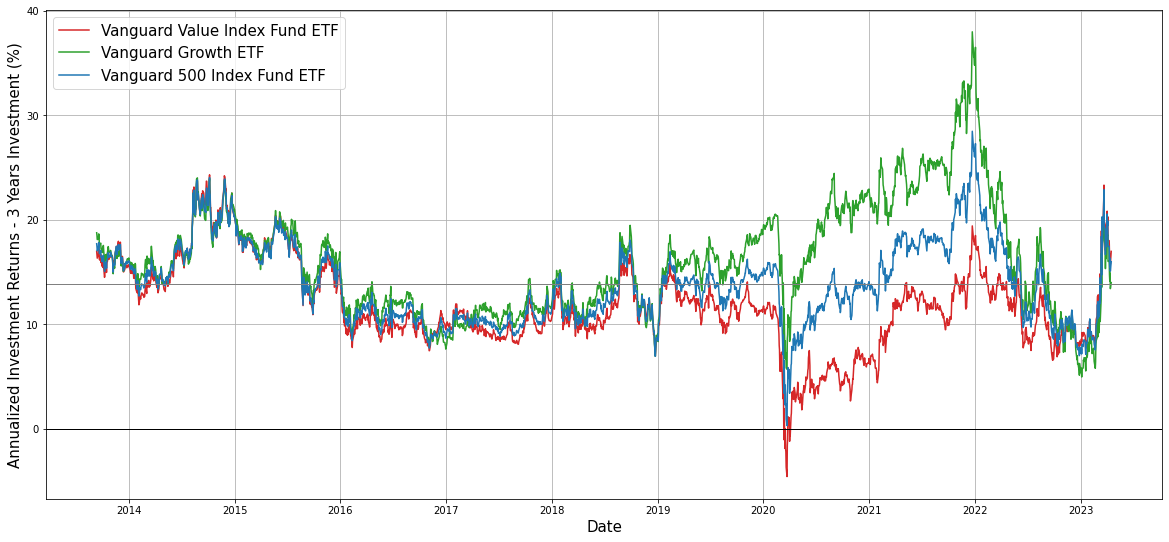

In [42]:
# Plot returns

fig = plt.figure(figsize = (20,9))
plt.plot(returnsx3year_annVG['Vanguard Value Index Fund ETF']*100, color = 'tab:red')
plt.plot(returnsx3year_annVG['Vanguard Growth ETF']*100, color = 'tab:green')
plt.plot(returnsx3year_annVG['Vanguard 500 Index Fund ETF']*100, color = 'tab:blue')

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.legend(returnsx3year_annVG.columns, prop={'size': 15})
plt.axhline(0, color = 'black', lw = 1)
plt.axhline(returnsx3year_annVG['Vanguard 500 Index Fund ETF'].mean()*100, color = 'grey', lw = 1)
plt.ylabel('Annualized Investment Returns - 3 Years Investment (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Annual Returns (3 years) VG.png')

## Annual Returns (5Y Investment)

In [43]:
# Calculate for each day the return of holding the asset for a year until that date

returnsx5yearV = priceV.pct_change(periods = 1260)
returnsx5yearV = returnsx5yearV.dropna()
returnsx5yearV = returnsx5yearV.round(4)

In [44]:
# Annualize investment returns for 5 years 

returnsx5year_annV = (1+returnsx5yearV)**(1/5)-1

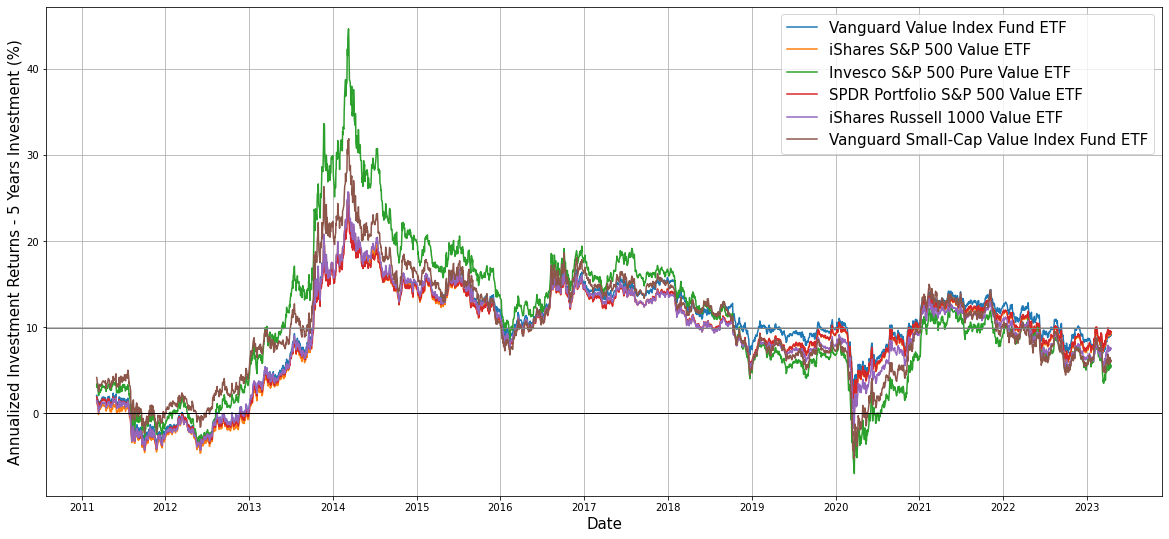

In [45]:
# Plot returns

fig = plt.figure(figsize = (20,9))
plt.plot(returnsx5year_annV*100)

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.legend(returnsx5year_annV.columns, prop={'size': 15})
plt.axhline(0, color = 'black', lw = 1)
plt.axhline(returnsx5year_annV['Vanguard Value Index Fund ETF'].mean()*100, color = 'grey', lw = 1)
plt.ylabel('Annualized Investment Returns - 5 Years Investment (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Annual Returns (5 years) V.png')

In [46]:
# Calculate for each day the return of holding the asset for a year until that date

returnsx5yearG = priceG.pct_change(periods = 1260)
returnsx5yearG = returnsx5yearG.dropna()
returnsx5yearG = returnsx5yearG.round(4)

In [47]:
# Annualize investment returns for 5 years 

returnsx5year_annG = (1+returnsx5yearG)**(1/5)-1

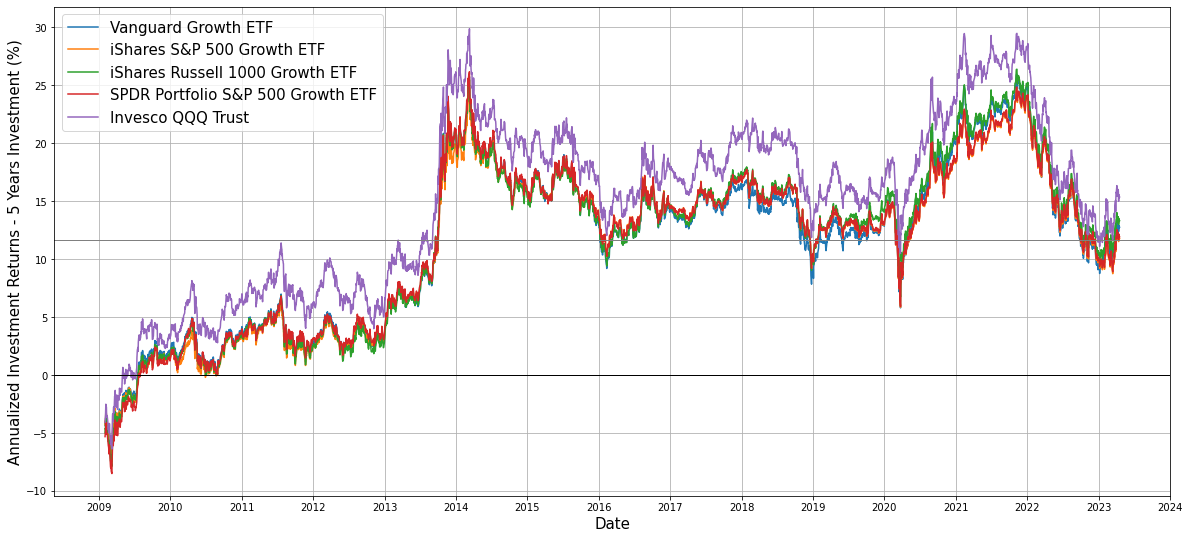

In [48]:
# Plot returns

fig = plt.figure(figsize = (20,9))
plt.plot(returnsx5year_annG*100)

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.legend(returnsx5year_annG.columns, prop={'size': 15})
plt.axhline(0, color = 'black', lw = 1)
plt.axhline(returnsx5year_annG['Vanguard Growth ETF'].mean()*100, color = 'grey', lw = 1)
plt.ylabel('Annualized Investment Returns - 5 Years Investment (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Annual Returns (5 years) G.png')

In [49]:
# Calculate for each day the return of holding the asset for a year until that date

returnsx5yearVG = priceVG.pct_change(periods = 1260)
returnsx5yearVG = returnsx5yearVG.dropna()
returnsx5yearVG = returnsx5yearVG.round(4)

In [93]:
# Annualize investment returns for 5 years 

returnsx5year_annVG = (1+returnsx5yearVG)**(1/5)-1

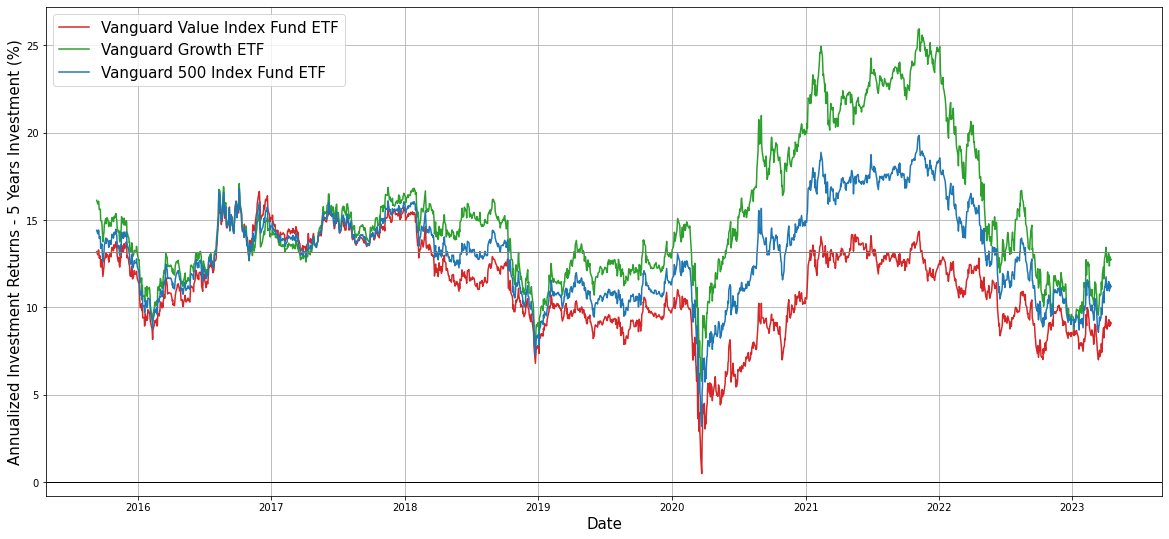

In [94]:
# Plot returns

fig = plt.figure(figsize = (20,9))
plt.plot(returnsx5year_annVG['Vanguard Value Index Fund ETF']*100, color = 'tab:red')
plt.plot(returnsx5year_annVG['Vanguard Growth ETF']*100, color = 'tab:green')
plt.plot(returnsx5year_annVG['Vanguard 500 Index Fund ETF']*100, color = 'tab:blue')

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.legend(returnsx5year_annVG.columns, prop={'size': 15})
plt.axhline(0, color = 'black', lw = 1)
plt.axhline(returnsx5year_annVG['Vanguard 500 Index Fund ETF'].mean()*100, color = 'grey', lw = 1)
plt.ylabel('Annualized Investment Returns - 5 Years Investment (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Annual Returns (5 years) VG.png')

## Comparison

In [52]:
#Rf = Rfr['13 Week Treasury Bill Rate'].values[-1]

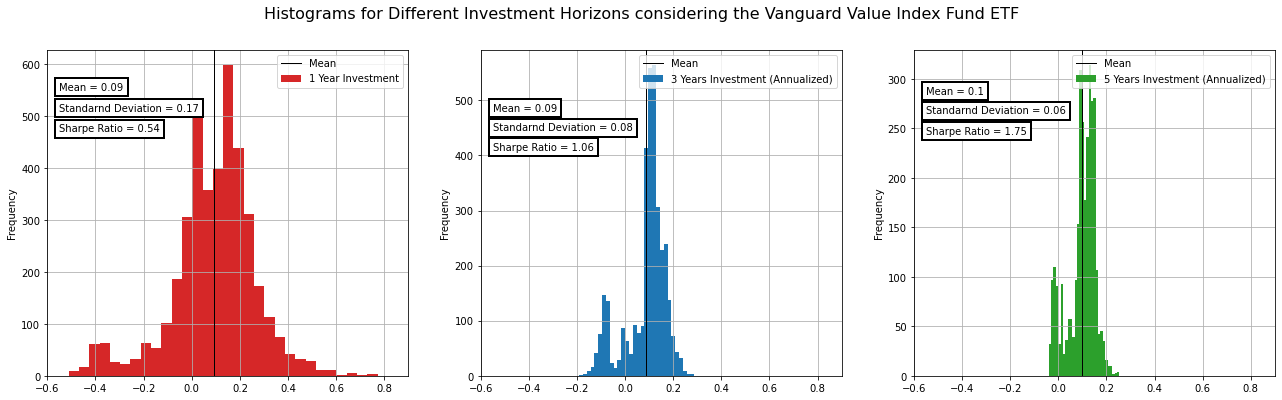

In [95]:
fig = plt.figure(figsize = (22,6))
fig.suptitle('Histograms for Different Investment Horizons considering the Vanguard Value Index Fund ETF', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(returnsx1yearV['Vanguard Value Index Fund ETF'], color = 'tab:red', label='1 Year Investment', bins = 30)
plt.grid(True)
plt.axvline(returnsx1yearV['Vanguard Value Index Fund ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 550, 'Mean = '+str(round(float(returnsx1yearV['Vanguard Value Index Fund ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 510,'Standarnd Deviation = '+str(round(float(returnsx1yearV['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 470,'Sharpe Ratio = '+str(round(float((returnsx1yearV['Vanguard Value Index Fund ETF'].mean())/ returnsx1yearV['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.legend(loc = 'best')


plt.subplot(1,3,2)
plt.hist(returnsx3year_annV['Vanguard Value Index Fund ETF'], label='3 Years Investment (Annualized)', color = 'tab:blue', bins = 30)
plt.grid(True)
plt.axvline(returnsx3year_annV['Vanguard Value Index Fund ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 480, 'Mean = '+str(round(float(returnsx3year_annV['Vanguard Value Index Fund ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 445,'Standarnd Deviation = '+str(round(float(returnsx3year_annV['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 410,'Sharpe Ratio = '+str(round(float((returnsx3year_annV['Vanguard Value Index Fund ETF'].mean())/ returnsx3year_annV['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.legend(loc = 'best')

plt.subplot(1,3,3)
plt.hist(returnsx5year_annV['Vanguard Value Index Fund ETF'], label='5 Years Investment (Annualized)', color = 'tab:green', bins = 30)
plt.grid(True)
plt.axvline(returnsx5year_annV['Vanguard Value Index Fund ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 285, 'Mean = '+str(round(float(returnsx5year_annV['Vanguard Value Index Fund ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 265,'Standarnd Deviation = '+str(round(float(returnsx5year_annV['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 244,'Sharpe Ratio = '+str(round(float((returnsx5year_annV['Vanguard Value Index Fund ETF'].mean())/ returnsx5year_annV['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.legend(loc = 'best')

plt.savefig(r'Images V&G\Histograms VG.png')

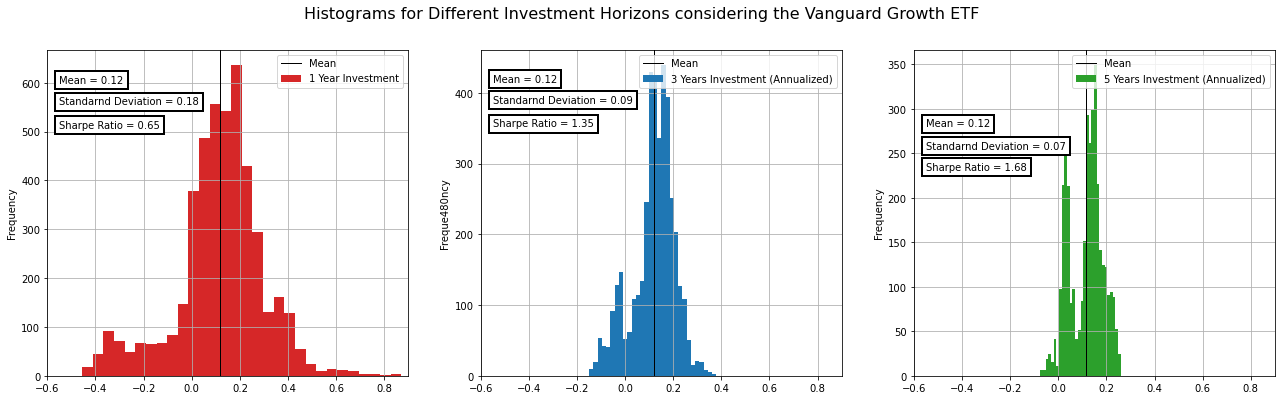

In [54]:
fig = plt.figure(figsize = (22,6))
fig.suptitle('Histograms for Different Investment Horizons considering the Vanguard Growth ETF', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(returnsx1yearG['Vanguard Growth ETF'], color = 'tab:red', label='1 Year Investment', bins = 30)
plt.grid(True)
plt.axvline(returnsx1yearG['Vanguard Growth ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 600, 'Mean = '+str(round(float(returnsx1yearG['Vanguard Growth ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 555,'Standarnd Deviation = '+str(round(float(returnsx1yearG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 507,'Sharpe Ratio = '+str(round(float((returnsx1yearG['Vanguard Growth ETF'].mean())/ returnsx1yearG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.legend(loc = 'best')


plt.subplot(1,3,2)
plt.hist(returnsx3year_annG['Vanguard Growth ETF'], label='3 Years Investment (Annualized)', color = 'tab:blue', bins = 30)
plt.grid(True)
plt.axvline(returnsx3year_annG['Vanguard Growth ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Freque480ncy')
plt.text(-0.55, 415, 'Mean = '+str(round(float(returnsx3year_annG['Vanguard Growth ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 385,'Standarnd Deviation = '+str(round(float(returnsx3year_annG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 352,'Sharpe Ratio = '+str(round(float((returnsx3year_annG['Vanguard Growth ETF'].mean())/ returnsx3year_annG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.legend(loc = 'best')

plt.subplot(1,3,3)
plt.hist(returnsx5year_annG['Vanguard Growth ETF'], label='5 Years Investment (Annualized)', color = 'tab:green', bins = 30)
plt.grid(True)
plt.axvline(returnsx5year_annG['Vanguard Growth ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 280, 'Mean = '+str(round(float(returnsx5year_annG['Vanguard Growth ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 255,'Standarnd Deviation = '+str(round(float(returnsx5year_annG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.text(-0.55, 231,'Sharpe Ratio = '+str(round(float((returnsx5year_annG['Vanguard Growth ETF'].mean())/ returnsx5year_annG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.legend(loc = 'best')

plt.savefig(r'Images V&G\Histograms G.png')

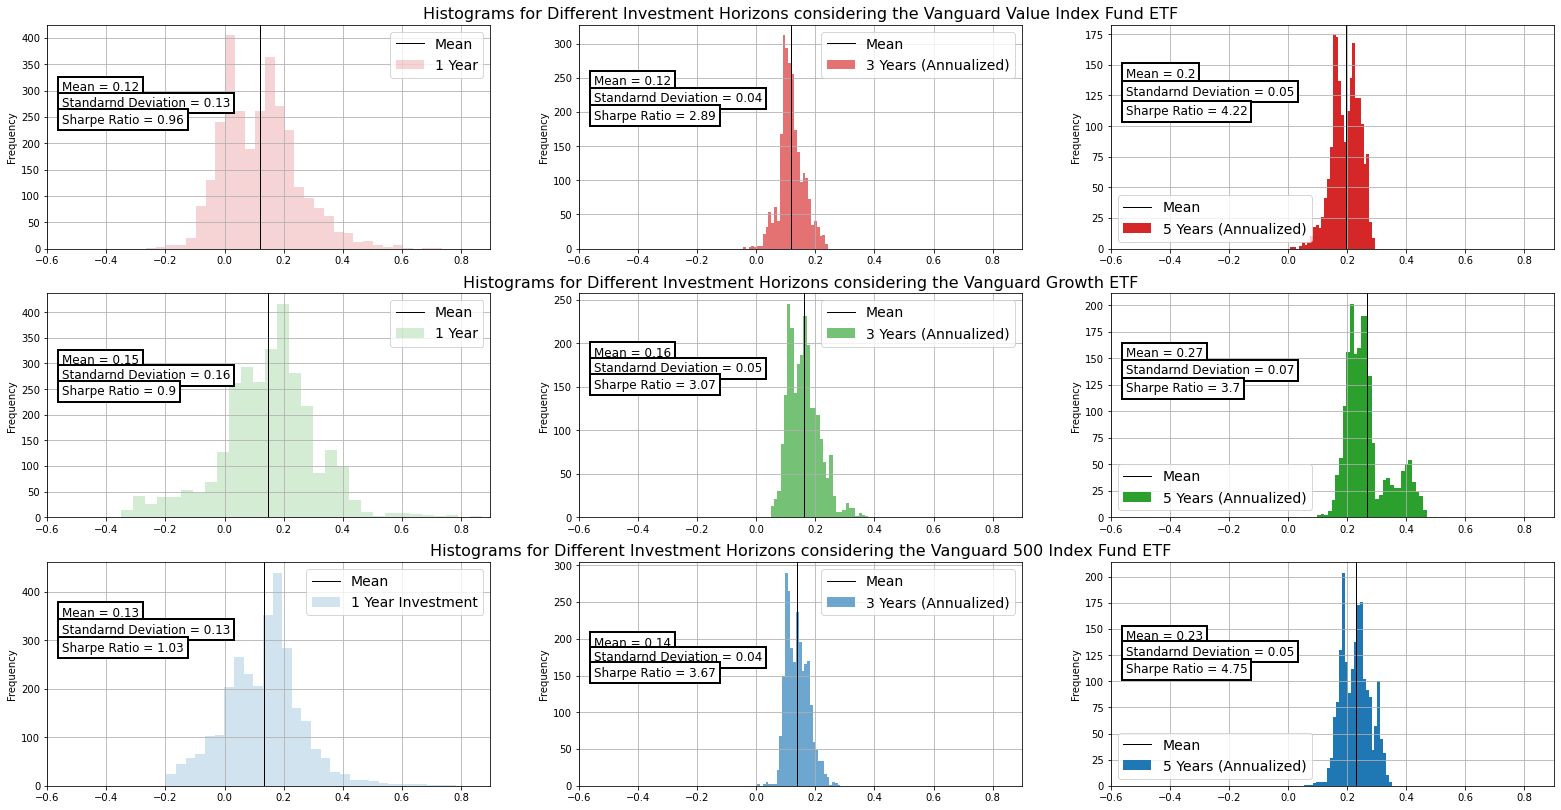

In [55]:
fig = plt.figure(figsize = (27,14))

plt.subplot(3,3,1)
plt.hist(returnsx1yearVG['Vanguard Value Index Fund ETF'], color = 'tab:red', alpha=0.2, label='1 Year', bins = 30)
plt.grid(True)
plt.axvline(returnsx1yearVG['Vanguard Value Index Fund ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 300, 'Mean = '+str(round(float(returnsx1yearVG['Vanguard Value Index Fund ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 270, 'Standarnd Deviation = '+str(round(float(returnsx1yearVG['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 238,'Sharpe Ratio = '+str(round(float((returnsx1yearVG['Vanguard Value Index Fund ETF'].mean())/ returnsx1yearVG['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.legend(loc = 'best', fontsize = 14)

plt.subplot(3,3,2)
plt.hist(returnsx3year_annVG['Vanguard Value Index Fund ETF'], label='3 Years (Annualized)', color = 'tab:red', alpha=0.65, bins = 30)
plt.grid(True)
plt.axvline(returnsx3year_annVG['Vanguard Value Index Fund ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.gca().set_title('Histograms for Different Investment Horizons considering the Vanguard Value Index Fund ETF',fontsize= 16)
plt.ylabel('Frequency')
plt.text(-0.55, 240, 'Mean = '+str(round(float(returnsx3year_annVG['Vanguard Value Index Fund ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 215,'Standarnd Deviation = '+str(round(float(returnsx3year_annVG['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 189,'Sharpe Ratio = '+str(round(float((returnsx3year_annVG['Vanguard Value Index Fund ETF'].mean())/ returnsx3year_annVG['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.legend(loc = 'best', fontsize = 14)

plt.subplot(3,3,3)
plt.hist(returnsx5year_annVG['Vanguard Value Index Fund ETF'], label='5 Years (Annualized)', color = 'tab:red', bins = 30)
plt.grid(True)
plt.axvline(returnsx5year_annVG['Vanguard Value Index Fund ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 140, 'Mean = '+str(round(float(returnsx5year_annVG['Vanguard Value Index Fund ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 125,'Standarnd Deviation = '+str(round(float(returnsx5year_annVG['Vanguard Value Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 109,'Sharpe Ratio = '+str(round(float((returnsx5year_annVG['Vanguard Value Index Fund ETF'].mean())/ returnsx5year_annVG['Vanguard Value Index Fund ETF'].std()),2)), fontsize = 12, bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2))
plt.legend(loc = 'lower left', fontsize = 14)

plt.subplot(3,3,4)
plt.hist(returnsx1yearVG['Vanguard Growth ETF'], color = 'tab:green', alpha=0.2, label='1 Year', bins = 30)
plt.grid(True)
plt.axvline(returnsx1yearVG['Vanguard Growth ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 300, 'Mean = '+str(round(float(returnsx1yearVG['Vanguard Growth ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 270,'Standarnd Deviation = '+str(round(float(returnsx1yearVG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 239,'Sharpe Ratio = '+str(round(float((returnsx1yearVG['Vanguard Growth ETF'].mean())/ returnsx1yearVG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.legend(loc = 'best', fontsize = 14)

plt.subplot(3,3,5)
plt.hist(returnsx3year_annVG['Vanguard Growth ETF'], label='3 Years (Annualized)', color = 'tab:green', alpha=0.65, bins = 30)
plt.grid(True)
plt.axvline(returnsx3year_annVG['Vanguard Growth ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.gca().set_title('Histograms for Different Investment Horizons considering the Vanguard Growth ETF',fontsize= 16)
plt.ylabel('Frequency')
plt.text(-0.55, 185, 'Mean = '+str(round(float(returnsx3year_annVG['Vanguard Growth ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 167,'Standarnd Deviation = '+str(round(float(returnsx3year_annVG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 148,'Sharpe Ratio = '+str(round(float((returnsx3year_annVG['Vanguard Growth ETF'].mean())/ returnsx3year_annVG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.legend(loc = 'best', fontsize = 14)

plt.subplot(3,3,6)
plt.hist(returnsx5year_annVG['Vanguard Growth ETF'], label='5 Years (Annualized)', color = 'tab:green', bins = 30)
plt.grid(True)
plt.axvline(returnsx5year_annVG['Vanguard Growth ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 151, 'Mean = '+str(round(float(returnsx5year_annVG['Vanguard Growth ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 135,'Standarnd Deviation = '+str(round(float(returnsx5year_annVG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 118,'Sharpe Ratio = '+str(round(float((returnsx5year_annVG['Vanguard Growth ETF'].mean())/ returnsx5year_annVG['Vanguard Growth ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.legend(loc = 'lower left', fontsize = 14)

plt.subplot(3,3,7)
plt.hist(returnsx1yearVG['Vanguard 500 Index Fund ETF'], color = 'tab:blue', alpha=0.2, label='1 Year Investment', bins = 30)
plt.grid(True)
plt.axvline(returnsx1yearVG['Vanguard 500 Index Fund ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 350, 'Mean = '+str(round(float(returnsx1yearVG['Vanguard 500 Index Fund ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 315,'Standarnd Deviation = '+str(round(float(returnsx1yearVG['Vanguard 500 Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 278,'Sharpe Ratio = '+str(round(float((returnsx1yearVG['Vanguard 500 Index Fund ETF'].mean())/ returnsx1yearVG['Vanguard 500 Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.legend(loc = 'best', fontsize = 14)

plt.subplot(3,3,8)
plt.hist(returnsx3year_annVG['Vanguard 500 Index Fund ETF'], label='3 Years (Annualized)', color = 'tab:blue', alpha=0.65, bins = 30)
plt.grid(True)
plt.gca().set_title('Histograms for Different Investment Horizons considering the Vanguard 500 Index Fund ETF',fontsize= 16)
plt.axvline(returnsx3year_annVG['Vanguard 500 Index Fund ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 190, 'Mean = '+str(round(float(returnsx3year_annVG['Vanguard 500 Index Fund ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 170,'Standarnd Deviation = '+str(round(float(returnsx3year_annVG['Vanguard 500 Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 149,'Sharpe Ratio = '+str(round(float((returnsx3year_annVG['Vanguard 500 Index Fund ETF'].mean())/ returnsx3year_annVG['Vanguard 500 Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.legend(loc = 'best', fontsize = 14)

plt.subplot(3,3,9)
plt.hist(returnsx5year_annVG['Vanguard 500 Index Fund ETF'], label='5 Years (Annualized)', color = 'tab:blue', bins = 30)
plt.grid(True)
plt.axvline(returnsx5year_annVG['Vanguard 500 Index Fund ETF'].mean(), color='black', lw =1, label='Mean')
plt.xlim(-0.6,0.9)
plt.ylabel('Frequency')
plt.text(-0.55, 140, 'Mean = '+str(round(float(returnsx5year_annVG['Vanguard 500 Index Fund ETF'].mean()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 125,'Standarnd Deviation = '+str(round(float(returnsx5year_annVG['Vanguard 500 Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.text(-0.55, 108,'Sharpe Ratio = '+str(round(float((returnsx5year_annVG['Vanguard 500 Index Fund ETF'].mean())/ returnsx5year_annVG['Vanguard 500 Index Fund ETF'].std()),2)), bbox=dict(facecolor = 'white', edgecolor='black', linewidth=2), fontsize = 12)
plt.legend(loc = 'lower left', fontsize = 14)

plt.savefig(r'Images V&G\Histograms VG.png')

## Annual Returns (Calendar) 

In [96]:
# Create a function that calculates gross returns

def total_return(values):
    return values.iloc[-1] / values.iloc[0] - 1

In [97]:
# Create a data frame that shows annual returns

annual_returnsV = priceV.groupby(priceV.index.year).apply(total_return)
annual_returnsV = annual_returnsV*100
annual_returnsV = annual_returnsV.round(2)
annual_returnsV = annual_returnsV.transpose()

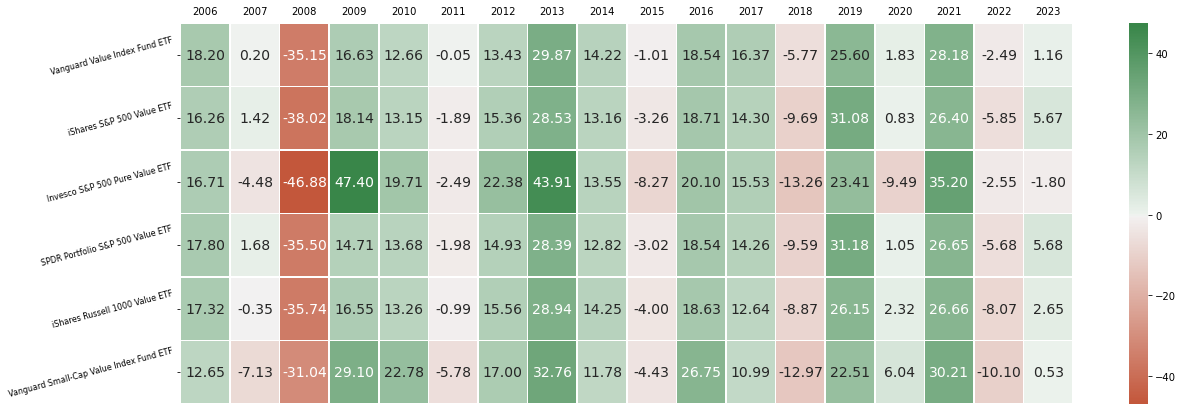

In [58]:
# Graph 

cmap = sns.diverging_palette(h_neg=20, h_pos=133, as_cmap=True)
fig1 = plt.figure(figsize=(20,7))
sns.heatmap(annual_returnsV, annot = True, linewidths=.6, cmap=cmap, fmt='.2f', center=0.0, annot_kws=dict(fontsize=14))
plt.xlabel('')
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, labeltop=True)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(rotation=15, fontsize = 8)
plt.savefig(r'Images V&G\Annual Returns V.png')

In [98]:
annual_returnsV_desc = annual_returnsV.transpose()
annual_returnsV_desc = annual_returnsV_desc.describe()
annual_returnsV_desc = annual_returnsV_desc.round(2)
#dfi.export(annual_returnsV_desc, r'Images V&G\Annual Returns Description V.png')

In [99]:
annual_returnsV_desc

,Vanguard Value Index Fund ETF,iShares S&P 500 Value ETF,Invesco S&P 500 Pure Value ETF,SPDR Portfolio S&P 500 Value ETF,iShares Russell 1000 Value ETF,Vanguard Small-Cap Value Index Fund ETF
count,18.00,18.00,18.00,18.00,18.00,18.00
mean,8.47,8.02,9.37,8.09,7.61,8.43
std,15.52,16.58,22.94,16.09,15.98,17.79
min,-35.15,-38.02,-46.88,-35.50,-35.74,-31.04
25%,0.01,-1.21,-4.00,-1.22,-0.83,-5.44
50%,13.04,13.16,14.54,13.25,12.95,11.38
75%,17.81,17.67,21.81,17.08,17.13,22.71
max,29.87,31.08,47.40,31.18,28.94,32.76


In [61]:
# Create a data frame that shows annual returns

annual_returnsG = priceG.groupby(priceG.index.year).apply(total_return)
annual_returnsG = annual_returnsG*100
annual_returnsG = annual_returnsG.round(2)
annual_returnsG = annual_returnsG.transpose()

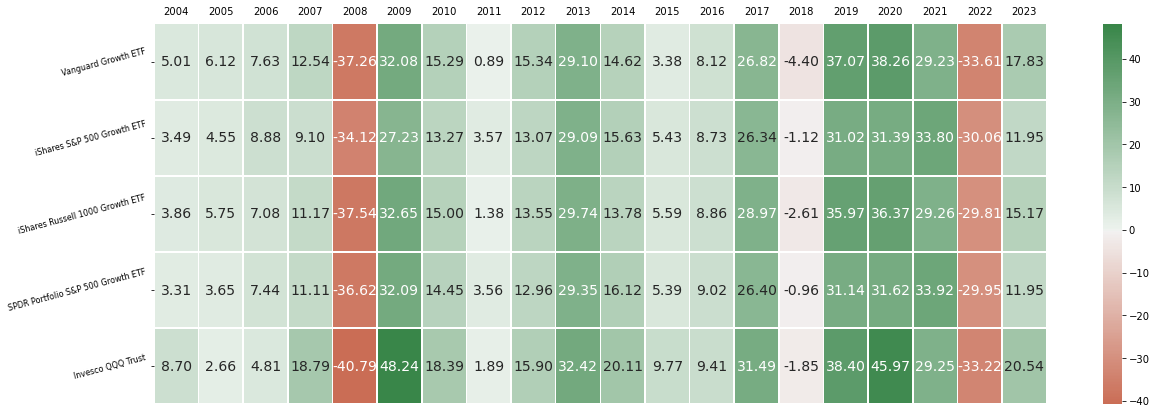

In [62]:
# Graph 

cmap = sns.diverging_palette(h_neg=20, h_pos=133, as_cmap=True)
fig1 = plt.figure(figsize=(20,7))
sns.heatmap(annual_returnsG, annot = True, linewidths=.6, cmap=cmap, fmt='.2f', center=0.0, annot_kws=dict(fontsize=14))
plt.xlabel('')
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, labeltop=True)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(rotation=15, fontsize = 8)
plt.savefig(r'Images V&G\Annual Returns G.png')

In [63]:
annual_returnsG_desc = annual_returnsG.transpose()
annual_returnsG_desc = annual_returnsG_desc.describe()
annual_returnsG_desc = annual_returnsG_desc.round(2)
#dfi.export(annual_returnsG_desc, r'Images V&G\Annual Returns Description G.png')

In [64]:
annual_returnsG_desc

,Vanguard Growth ETF,iShares S&P 500 Growth ETF,iShares Russell 1000 Growth ETF,SPDR Portfolio S&P 500 Growth ETF,Invesco QQQ Trust
count,20.00,20.00,20.00,20.00,20.00
mean,11.20,10.56,11.21,10.80,14.04
std,20.09,18.15,19.49,18.81,22.60
min,-37.26,-34.12,-37.54,-36.62,-40.79
25%,4.60,4.30,5.16,3.63,4.27
50%,13.58,10.52,12.36,11.53,17.14
75%,27.39,26.56,29.04,27.14,29.81
max,38.26,33.80,36.37,33.92,48.24


In [65]:
# Create a data frame that shows annual returns

annual_returnsVG = priceVG.groupby(priceVG.index.year).apply(total_return)
annual_returnsVG = annual_returnsVG*100
annual_returnsVG = annual_returnsVG.round(2)
annual_returnsVG = annual_returnsVG.transpose()

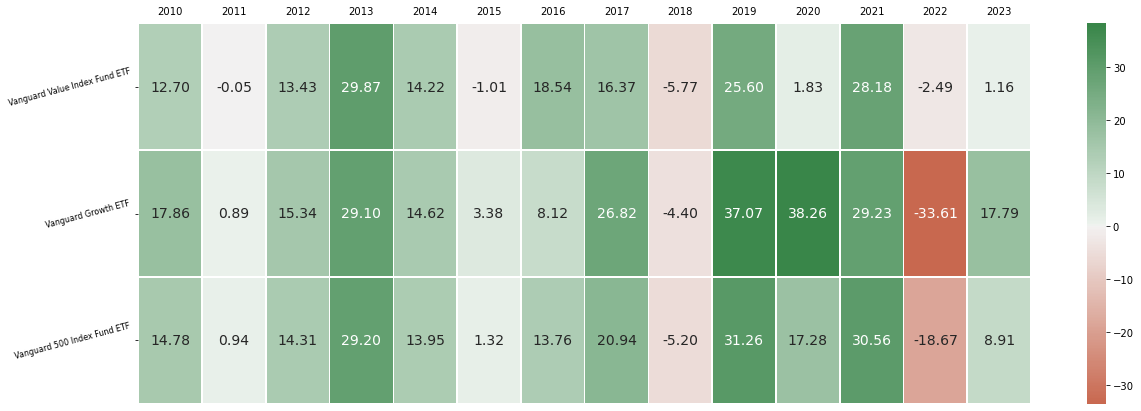

In [66]:
# Graph 

cmap = sns.diverging_palette(h_neg=20, h_pos=133, as_cmap=True)
fig1 = plt.figure(figsize=(20,7))
sns.heatmap(annual_returnsVG, annot = True, linewidths=.6, cmap=cmap, fmt='.2f', center=0.0, annot_kws=dict(fontsize=14))
plt.xlabel('')
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, labeltop=True)
plt.xticks(rotation=0, fontsize = 10)
plt.yticks(rotation=15, fontsize = 8)
plt.savefig(r'Images V&G\Annual Returns VG.png')

In [67]:
annual_returnsVG_desc = annual_returnsVG.transpose()
annual_returnsVG_desc = annual_returnsVG_desc.describe()
annual_returnsVG_desc = annual_returnsVG_desc.round(2)
#dfi.export(annual_returnsVG_desc, r'Images V&G\Annual Returns Description VG.png')

In [68]:
annual_returnsVG_desc

,Vanguard Value Index Fund ETF,Vanguard Growth ETF,Vanguard 500 Index Fund ETF
count,14.00,14.00,14.00
mean,10.90,14.32,12.38
std,12.02,19.01,14.19
min,-5.77,-33.61,-18.67
25%,0.25,4.56,3.22
50%,13.06,16.56,14.13
75%,18.00,28.53,20.03
max,29.87,38.26,31.26


In [69]:
#annual_returnsVG_desc = annual_returnsVG_desc.reset_index()

#import plotly.figure_factory as ff
#import pandas as pd

#fig = ff.create_table(annual_returnsVG_desc)
#fig.update_layout(
#autosize=True,
#)

#fig.write_image(r'Images V&G\Annual Returns Description VG.png', scale=2)

## Cumulative Total Return and Effective Annual Return 

In [70]:
import datetime
today = datetime.date.today()

In [71]:
# Count the number of days from the first date to the last date included in the sample

d0 = date(2010,9,9)
d1 = date(today.year,today.month,today.day)
delta = d1 - d0
days = delta.days

In [72]:
# Calculate cumulative total returns

cumtotal_returnV = priceV.apply(total_return)
cumtotal_returnV = cumtotal_returnV.to_frame()
cumtotal_returnV = cumtotal_returnV*100

ticker_label = ['Cumulative Total Return (%)']

cumtotal_returnV.columns = ticker_label
cumtotal_returnV = cumtotal_returnV.round(2)
#dfi.export(cumtotal_returnV, r'Images V&G\Cumulative Total Return V.png')
cumtotal_returnV

,Cumulative Total Return (%)
Vanguard Value Index Fund ETF,276.61
iShares S&P 500 Value ETF,242.31
Invesco S&P 500 Pure Value ETF,271.10
SPDR Portfolio S&P 500 Value ETF,253.57
iShares Russell 1000 Value ETF,220.78
Vanguard Small-Cap Value Index Fund ETF,253.67


In [73]:
# Create a dataframe with effective annual returns

EARV = pd.DataFrame()

for ac in cumtotal_returnV.index:
    EARV[ac] = (1 + cumtotal_returnV.loc[ac]/100)**(365/days)-1
    
EARV = EARV.transpose()
EARV = EARV*100

ticker_label = ['Effective Annual Return (%)']

EARV.columns = ticker_label
EARV = EARV.round(2)
#dfi.export(EARV, r'Images V&G\Effective Annual Return V.png')
EARV

,Effective Annual Return (%)
Vanguard Value Index Fund ETF,11.09
iShares S&P 500 Value ETF,10.25
Invesco S&P 500 Pure Value ETF,10.96
SPDR Portfolio S&P 500 Value ETF,10.53
iShares Russell 1000 Value ETF,9.68
Vanguard Small-Cap Value Index Fund ETF,10.54


In [74]:
# Calculate cumulative total returns

cumtotal_returnG = priceG.apply(total_return)
cumtotal_returnG = cumtotal_returnG.to_frame()
cumtotal_returnG = cumtotal_returnG*100

ticker_label = ['Cumulative Total Return (%)']

cumtotal_returnG.columns = ticker_label
cumtotal_returnG = cumtotal_returnG.round(2)
#dfi.export(cumtotal_returnG, r'Images V&G\Cumulative Total Return G.png')
cumtotal_returnG

,Cumulative Total Return (%)
Vanguard Growth ETF,523.00
iShares S&P 500 Growth ETF,492.01
iShares Russell 1000 Growth ETF,542.16
SPDR Portfolio S&P 500 Growth ETF,496.69
Invesco QQQ Trust,899.72


In [75]:
# Create a dataframe with effective annual returns

EARG = pd.DataFrame()

for ac in cumtotal_returnG.index:
    EARG[ac] = (1 + cumtotal_returnG.loc[ac]/100)**(365/days)-1
    
EARG = EARG.transpose()
EARG = EARG*100

ticker_label = ['Effective Annual Return (%)']

EARG.columns = ticker_label
EARG = EARG.round(2)
#dfi.export(EARG, r'Images V&G\Effective Annual Return G.png')
EARG

,Effective Annual Return (%)
Vanguard Growth ETF,15.61
iShares S&P 500 Growth ETF,15.14
iShares Russell 1000 Growth ETF,15.89
SPDR Portfolio S&P 500 Growth ETF,15.22
Invesco QQQ Trust,20.03


In [76]:
# Calculate cumulative total returns

cumtotal_returnVG = priceVG.apply(total_return)
cumtotal_returnVG = cumtotal_returnVG.to_frame()
cumtotal_returnVG = cumtotal_returnVG*100

ticker_label = ['Cumulative Total Return (%)']

cumtotal_returnVG.columns = ticker_label
cumtotal_returnVG = cumtotal_returnVG.round(2)
#dfi.export(cumtotal_returnVG, r'Images V&G\Cumulative Total Return VG.png')
cumtotal_returnVG

,Cumulative Total Return (%)
Vanguard Value Index Fund ETF,308.35
Vanguard Growth ETF,447.80
Vanguard 500 Index Fund ETF,376.39


In [77]:
# Create a dataframe with effective annual returns

EARVG = pd.DataFrame()

for ac in cumtotal_returnVG.index:
    EARVG[ac] = (1 + cumtotal_returnVG.loc[ac]/100)**(365/days)-1
    
EARVG = EARVG.transpose()
EARVG = EARVG*100

ticker_label = ['Effective Annual Return (%)']

EARVG.columns = ticker_label
EARVG = EARVG.round(2)
#dfi.export(EARVG, r'Images V&G\Effective Annual Return VG.png')
EARVG

,Effective Annual Return (%)
Vanguard Value Index Fund ETF,11.80
Vanguard Growth ETF,14.44
Vanguard 500 Index Fund ETF,13.18


# Risk and Return Measures

## Sharpe Ratio

In [78]:
sd_V = returnsx1yearV.std()
mean_V = returnsx1yearV.mean()
sharpe_ratioV = (mean_V)/sd_V
sharpe_ratioV = sharpe_ratioV.to_frame()
label = ['Sharpe Ratio']
sharpe_ratioV.columns = label
sharpe_ratioV.sort_values('Sharpe Ratio', ascending = False)
#dfi.export(sharpe_ratioV, r'Images V&G\Sharpe Ratio V.png')
sharpe_ratioV

,Sharpe Ratio
Vanguard Value Index Fund ETF,0.536419
iShares S&P 500 Value ETF,0.485876
Invesco S&P 500 Pure Value ETF,0.406158
SPDR Portfolio S&P 500 Value ETF,0.507715
iShares Russell 1000 Value ETF,0.466314
Vanguard Small-Cap Value Index Fund ETF,0.442155


In [79]:
sd_G = returnsx1yearG.std()
mean_G = returnsx1yearG.mean()
sharpe_ratioG = (mean_G)/sd_G
sharpe_ratioG = sharpe_ratioG.to_frame()
label = ['Sharpe Ratio']
sharpe_ratioG.columns = label
sharpe_ratioG.sort_values('Sharpe Ratio', ascending = False)
#dfi.export(sharpe_ratioG, r'Images V&G\Sharpe Ratio G.png')
sharpe_ratioG 

,Sharpe Ratio
Vanguard Growth ETF,0.654254
iShares S&P 500 Growth ETF,0.689282
iShares Russell 1000 Growth ETF,0.676856
SPDR Portfolio S&P 500 Growth ETF,0.673634
Invesco QQQ Trust,0.749337


In [80]:
sd_VG = returnsx1yearVG.std()
mean_VG = returnsx1yearVG.mean()
sharpe_ratioVG = (mean_VG)/sd_VG
sharpe_ratioVG = sharpe_ratioVG.to_frame()
label = ['Sharpe Ratio']
sharpe_ratioVG.columns = label
sharpe_ratioVG = sharpe_ratioVG.round(2)
sharpe_ratioVG.sort_values('Sharpe Ratio', ascending = False)
#dfi.export(sharpe_ratioVG, r'Images V&G\Sharpe Ratio VG.png')
sharpe_ratioVG

,Sharpe Ratio
Vanguard Value Index Fund ETF,0.96
Vanguard Growth ETF,0.90
Vanguard 500 Index Fund ETF,1.03


# Risk Measures 

## Drawdown 

In [102]:
# Calculate Daily Drawdown 

rolling_maxV = priceVG['Vanguard Value Index Fund ETF'].cummax()
daily_drawdownV = priceVG['Vanguard Value Index Fund ETF']/rolling_maxV - 1.0



Date
2010-09-09     34.50
2010-09-10     34.64
2010-09-13     35.05
2010-09-14     35.05
2010-09-15     35.05
               ...  
2023-04-11    146.84
2023-04-12    146.84
2023-04-13    146.84
2023-04-14    146.84
2023-04-17    146.84
Name: Vanguard Value Index Fund ETF, Length: 3172, dtype: float64

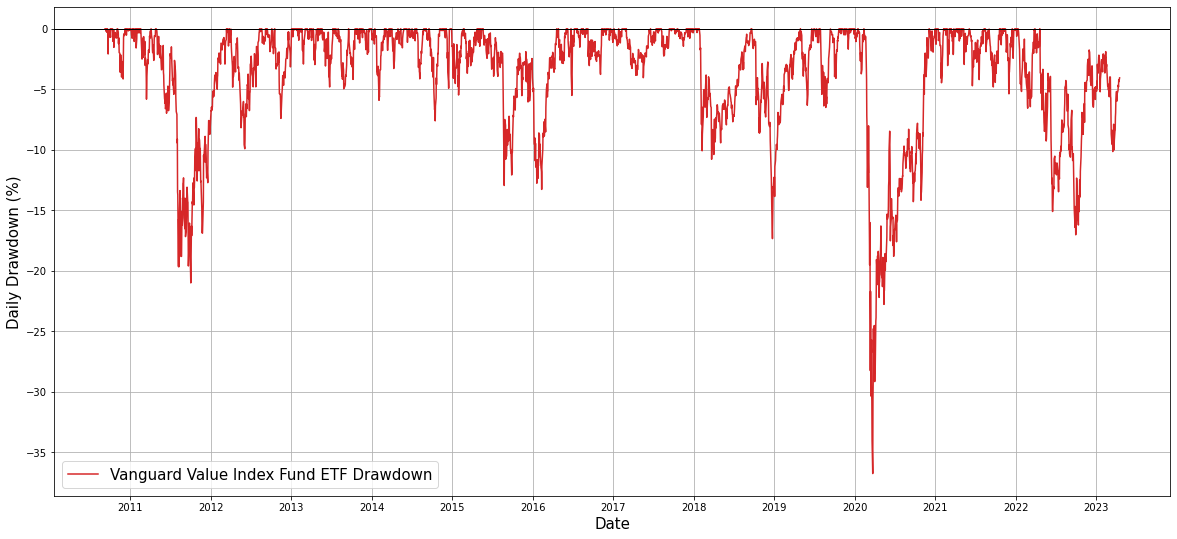

In [82]:
fig = plt.figure(figsize = (20,9))
plt.plot(daily_drawdownV*100, label = 'Vanguard Value Index Fund ETF Drawdown', color = 'tab:red')
plt.axhline(0, color = 'black', lw = 1)
plt.grid(True)

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.legend(prop={'size': 15})
plt.ylabel('Daily Drawdown (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Drawdown V.png')

In [83]:
# Calculate Daily Drawdown 

rolling_maxG = priceVG['Vanguard Growth ETF'].cummax()
daily_drawdownG = priceVG['Vanguard Growth ETF']/rolling_maxG - 1.0

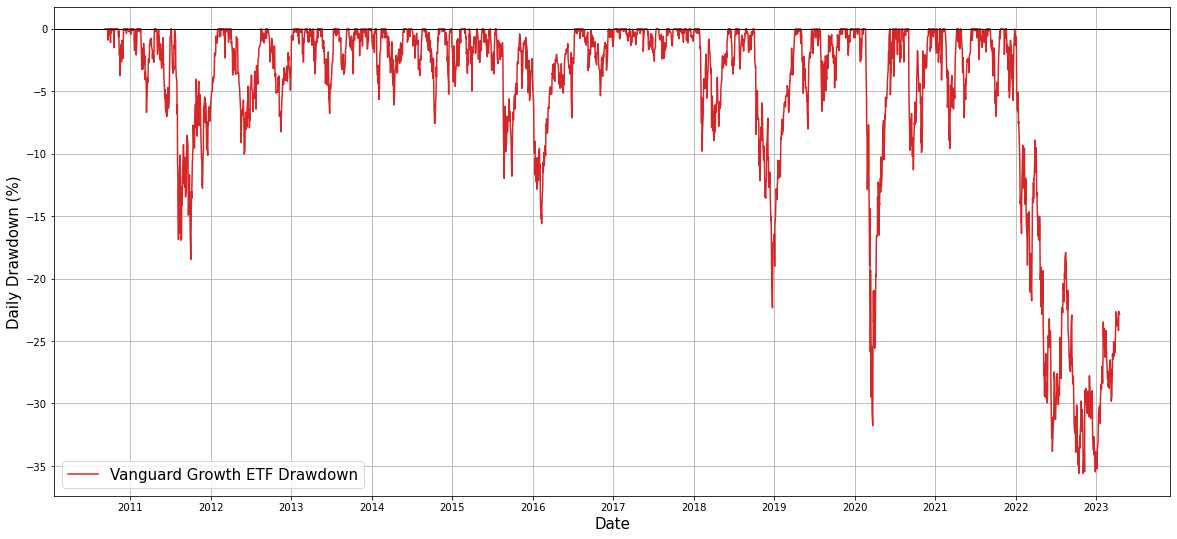

In [84]:
fig = plt.figure(figsize = (20,9))
plt.plot(daily_drawdownG*100, label = 'Vanguard Growth ETF Drawdown', color = 'tab:red')
plt.axhline(0, color = 'black', lw = 1)
plt.grid(True)

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.legend(prop={'size': 15})
plt.ylabel('Daily Drawdown (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Drawdown G.png')

In [85]:
# Calculate Daily Drawdown 

rolling_max500 = priceVG['Vanguard 500 Index Fund ETF'].cummax()
daily_drawdown500 = priceVG['Vanguard 500 Index Fund ETF']/rolling_max500 - 1.0

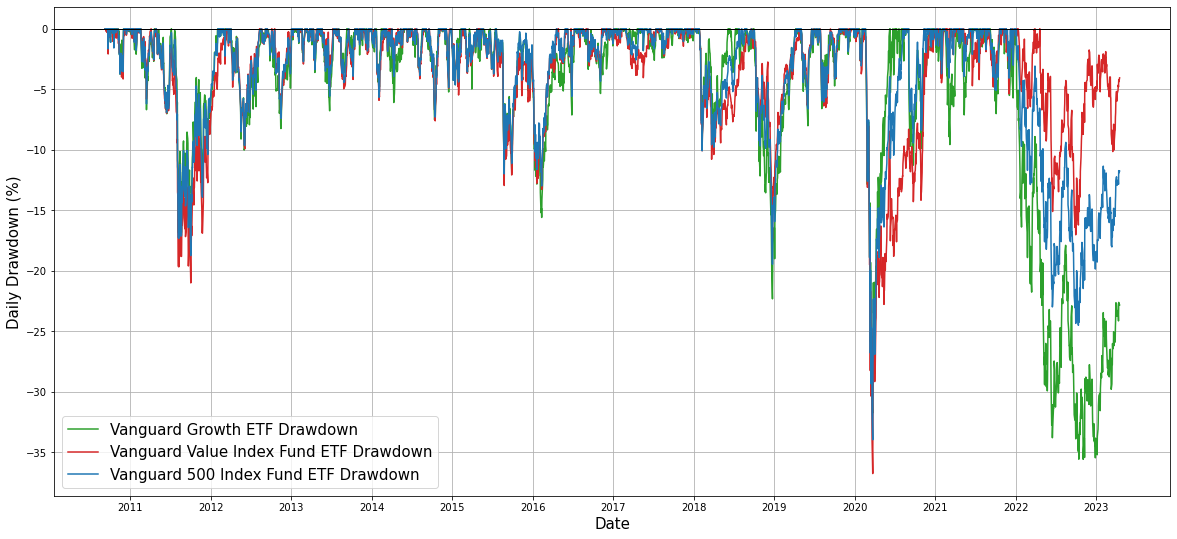

In [86]:
fig = plt.figure(figsize = (20,9))
plt.plot(daily_drawdownG*100, label = 'Vanguard Growth ETF Drawdown', color = 'tab:green')
plt.plot(daily_drawdownV*100, label = 'Vanguard Value Index Fund ETF Drawdown', color = 'tab:red')
plt.plot(daily_drawdown500*100, label = 'Vanguard 500 Index Fund ETF Drawdown', color = 'tab:blue')
plt.axhline(0, color = 'black', lw = 1)

FuncFormatter = DateFormatter("%Y")
fig.axes[0].get_xaxis().set_major_formatter(FuncFormatter) 
fig.axes[0].get_xaxis().set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.legend(prop={'size': 15})
plt.ylabel('Daily Drawdown (%)', size = 15)
plt.xlabel('Date', size = 15)
plt.savefig(r'Images V&G\Drawdown VG.png')

## Correlations

In [87]:
total_corrV = returnsx1yearV.corr()
total_corrV

,Vanguard Value Index Fund ETF,iShares S&P 500 Value ETF,Invesco S&P 500 Pure Value ETF,SPDR Portfolio S&P 500 Value ETF,iShares Russell 1000 Value ETF,Vanguard Small-Cap Value Index Fund ETF
Vanguard Value Index Fund ETF,1.000000,0.994960,0.935347,0.994607,0.995328,0.941926
iShares S&P 500 Value ETF,0.994960,1.000000,0.929874,0.997736,0.994862,0.934216
Invesco S&P 500 Pure Value ETF,0.935347,0.929874,1.000000,0.916186,0.937195,0.956510
SPDR Portfolio S&P 500 Value ETF,0.994607,0.997736,0.916186,1.000000,0.994967,0.931690
iShares Russell 1000 Value ETF,0.995328,0.994862,0.937195,0.994967,1.000000,0.954866
Vanguard Small-Cap Value Index Fund ETF,0.941926,0.934216,0.956510,0.931690,0.954866,1.000000


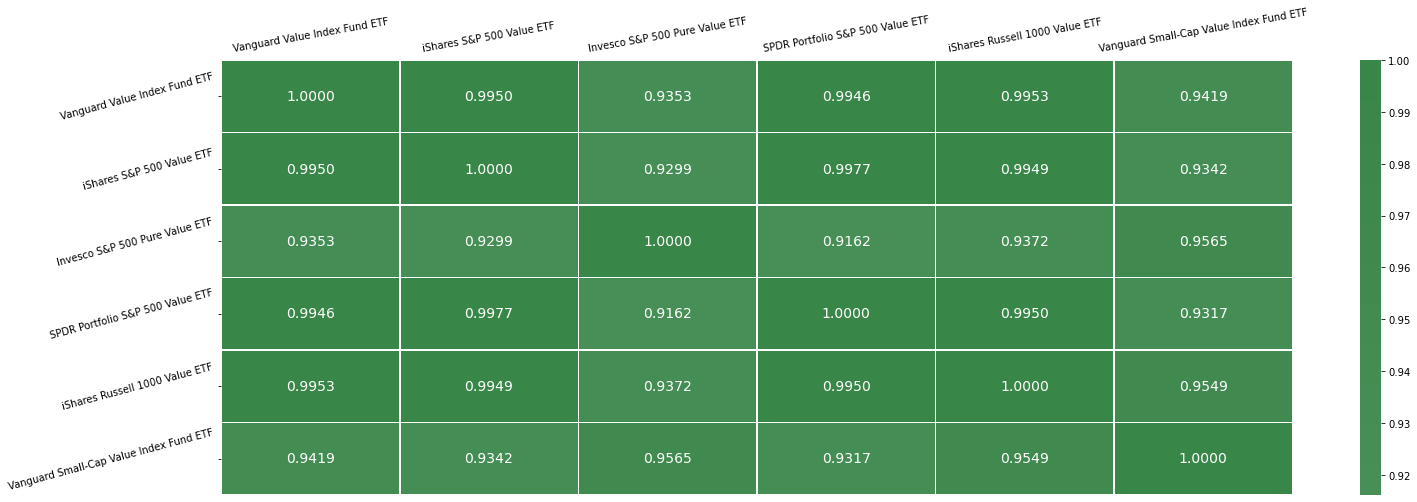

In [88]:
cmap = sns.diverging_palette(h_neg=15, h_pos=133, as_cmap=True)
fig1 = plt.figure(figsize=(24,8))
sns.heatmap(total_corrV, annot = True, linewidths=.5, cmap=cmap, fmt='.4f', center=0.0, annot_kws=dict(fontsize=14))
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, labeltop=True)
plt.xticks(rotation=10, fontsize = 5,size = 10)
plt.yticks(rotation=15, fontsize = 5,size = 10)
plt.savefig(r'Images V&G\Total Correlations V.png')

In [89]:
total_corrG = returnsx1yearG.corr()
total_corrG

,Vanguard Growth ETF,iShares S&P 500 Growth ETF,iShares Russell 1000 Growth ETF,SPDR Portfolio S&P 500 Growth ETF,Invesco QQQ Trust
Vanguard Growth ETF,1.000000,0.990829,0.996979,0.990618,0.982413
iShares S&P 500 Growth ETF,0.990829,1.000000,0.993671,0.996471,0.969973
iShares Russell 1000 Growth ETF,0.996979,0.993671,1.000000,0.994188,0.982366
SPDR Portfolio S&P 500 Growth ETF,0.990618,0.996471,0.994188,1.000000,0.974552
Invesco QQQ Trust,0.982413,0.969973,0.982366,0.974552,1.000000


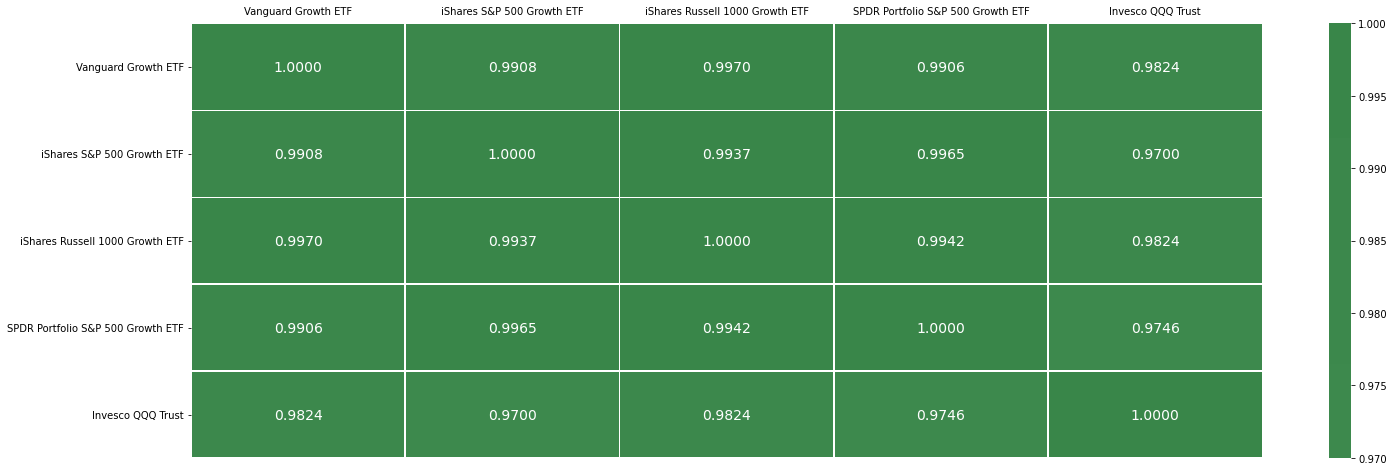

In [90]:
cmap = sns.diverging_palette(h_neg=15, h_pos=133, as_cmap=True)
fig1 = plt.figure(figsize=(24,8))
sns.heatmap(total_corrG, annot = True, linewidths=.5, cmap=cmap, fmt='.4f', center=0.0, annot_kws=dict(fontsize=14))
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, labeltop=True)
plt.xticks(rotation=0, fontsize = 12,size = 10)
plt.yticks(rotation=0, fontsize = 12,size = 10)
plt.savefig(r'Images V&G\Total Correlations G.png')

In [91]:
total_corrVG = returnsx1yearVG.corr()
total_corrVG

,Vanguard Value Index Fund ETF,Vanguard Growth ETF,Vanguard 500 Index Fund ETF
Vanguard Value Index Fund ETF,1.000000,0.672488,0.904192
Vanguard Growth ETF,0.672488,1.000000,0.922277
Vanguard 500 Index Fund ETF,0.904192,0.922277,1.000000


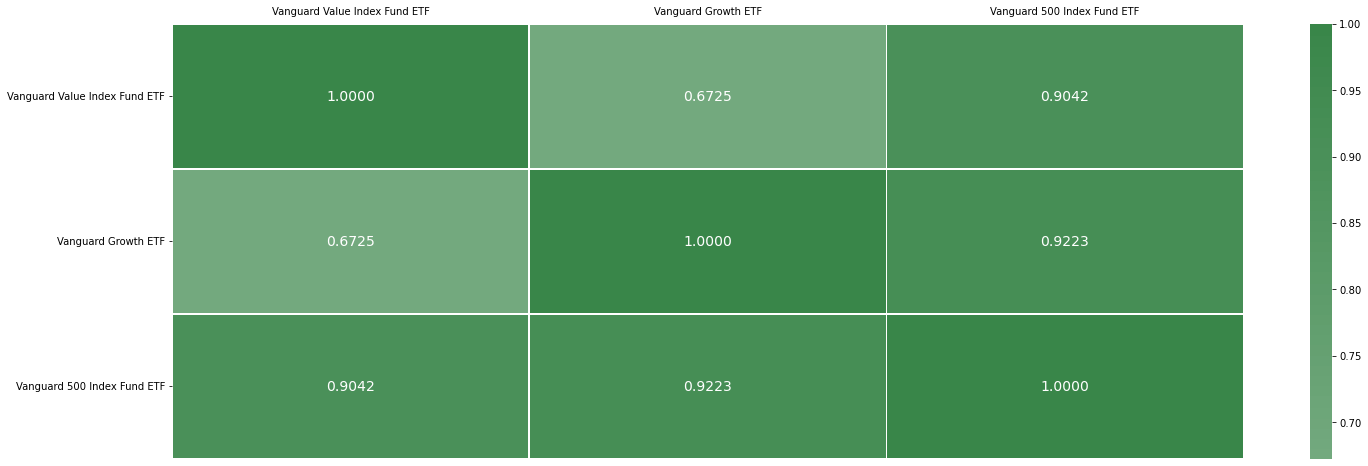

In [92]:
cmap = sns.diverging_palette(h_neg=15, h_pos=133, as_cmap=True)
fig1 = plt.figure(figsize=(24,8))
sns.heatmap(total_corrVG, annot = True, linewidths=.5, cmap=cmap, fmt='.4f', center=0.0, annot_kws=dict(fontsize=14))
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, labeltop=True)
plt.xticks(rotation=0, fontsize = 12,size = 10)
plt.yticks(rotation=0, fontsize = 12,size = 10)
plt.savefig(r'Images V&G\Total Correlations VG.png')